In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# read in the data
order = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizza = pd.read_csv('pizzas.csv')
pizza_type = pd.read_csv('pizza_sales.csv', encoding='latin1')

In [3]:
merged_data= order.merge(order_details, on='order_id').merge(pizza, on='pizza_id').merge(pizza_type, on='pizza_type_id')

In [4]:
merged_data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [5]:
merged_data.shape

(48620, 12)

In [6]:
merged_data.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')

In [7]:
merged_data.dtypes

order_id              int64
date                 object
time                 object
order_details_id      int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
dtype: object

In [8]:
merged_data.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [9]:
merged_data.duplicated().sum()

0

In [10]:
# Convert the "date" column to datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Extract the year, month, and day from the "date" column
merged_data["Year"] = merged_data["date"].dt.year
merged_data["Month"] = merged_data["date"].dt.month
merged_data["Day"] = merged_data["date"].dt.day

In [11]:
# Extract the weekday from the "date" column
merged_data['Weekday']= pd.DatetimeIndex(merged_data['date']).day_name()

In [12]:
merged_data['time']= pd.to_datetime(merged_data['time'])

# Extract the hour and minute from the 'time' column
merged_data['Hour']= merged_data['time'].dt.hour
merged_data['Minute']= merged_data['time'].dt.minute

In [13]:
# Recheck the data
merged_data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Year,Month,Day,Weekday,Hour,Minute
0,1,2015-01-01,2023-10-28 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,1,Thursday,11,38
1,77,2015-01-02,2023-10-28 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,2,Friday,12,22
2,146,2015-01-03,2023-10-28 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,3,Saturday,14,22
3,163,2015-01-03,2023-10-28 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,3,Saturday,16,54
4,247,2015-01-04,2023-10-28 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,4,Sunday,20,55


# DATA EXPLORATION

In [14]:
print(merged_data.Year.unique(),'\n\n', merged_data.Month.unique(),'\n\n', merged_data.Day.unique())

[2015] 

 [ 1  2  3  4  5  6  7  8  9 10 11 12] 

 [ 1  2  3  4  6  7  9 10 14 17 19 21 22 23 27 28 29 30 31  5  8 11 12 13
 16 18 20 24 26 15 25]


In [15]:
merged_data.Weekday.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday',
       'Monday'], dtype=object)

In [16]:
print(merged_data.Hour.unique(),'\n\n', merged_data.Minute.unique())

[11 12 14 16 20 17 13 18 19 15 21 22 23  9 10] 

 [38 22 54 55 11 37  3 51 56 34 44  0 36 53 45 16 26 58 27 28 59  1 35 23
 41 31 18  8 13 52  4 50 48 25 43 32  7 19  9 46 40  6 24 39 42 14  2  5
 49 57 12 10 29 21 17 47 30 33 15 20]


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  Year              48620 non-null  int64         
 13  Month             48620 non-null  int64         
 14  Day               4862

In [18]:
merged_data.describe()

,order_id,order_details_id,quantity,price,Year,Month,Day,Hour,Minute
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132,2015.0,6.451131,15.461662,15.911806,29.654936
std,6180.119770,14035.529381,0.143077,3.621789,0.0,3.435420,8.809041,3.149836,17.310959
min,1.000000,1.000000,1.000000,9.750000,2015.0,1.000000,1.000000,9.000000,0.000000
25%,5337.000000,12155.750000,1.000000,12.750000,2015.0,3.000000,8.000000,13.000000,15.000000
50%,10682.500000,24310.500000,1.000000,16.500000,2015.0,6.000000,15.000000,16.000000,30.000000
75%,16100.000000,36465.250000,1.000000,20.250000,2015.0,9.000000,23.000000,18.000000,45.000000
max,21350.000000,48620.000000,4.000000,35.950000,2015.0,12.000000,31.000000,23.000000,59.000000


In [19]:
merged_data ['date'].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

In [20]:
merged_data ['time'].value_counts()

2023-10-28 12:32:00    26
2023-10-28 11:59:10    24
2023-10-28 12:26:04    23
2023-10-28 12:52:36    23
2023-10-28 12:53:29    23
                       ..
2023-10-28 21:41:31     1
2023-10-28 15:54:54     1
2023-10-28 17:19:08     1
2023-10-28 12:46:25     1
2023-10-28 12:09:59     1
Name: time, Length: 16382, dtype: int64

In [21]:
merged_data['order_id'].value_counts()

18845    21
10760    21
13906    15
14304    15
17464    15
         ..
11184     1
11805     1
12261     1
12423     1
21282     1
Name: order_id, Length: 21350, dtype: int64

In [22]:
merged_data['pizza_id'].value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

In [23]:
merged_data['pizza_type_id'].value_counts()

classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
sicilian        1887
spicy_ital      1887
southw_ckn      1885
four_cheese     1850
ital_supr       1849
big_meat        1811
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1359
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
spin_pesto       957
soppressata      957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: pizza_type_id, dtype: int64

In [24]:
merged_data['name'].value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [25]:
merged_data['ingredients'].value_counts()

Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccante Cheese, Mo

In [26]:
merged_data['quantity'].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

<Axes: xlabel='quantity', ylabel='count'>

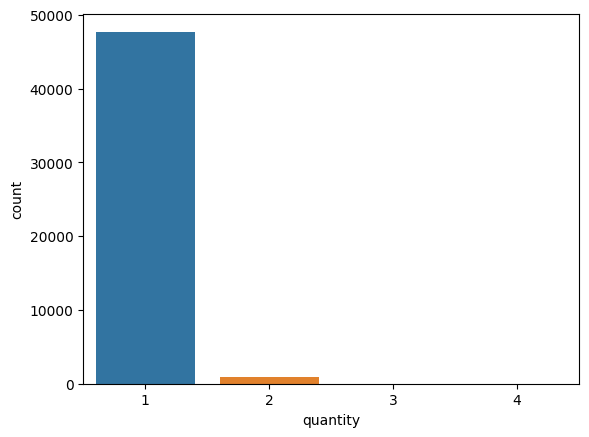

In [27]:
sns.countplot(data=merged_data, x='quantity')

1 is the most quantity sold

In [28]:
merged_data['size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

<Axes: xlabel='size', ylabel='count'>

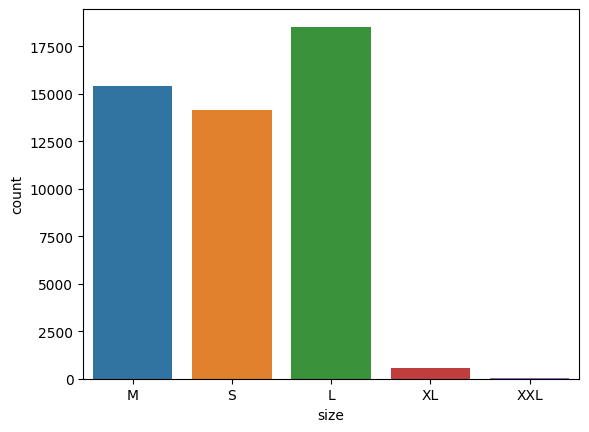

In [29]:
sns.countplot(data=merged_data, x='size')

L size pizza are sold more

In [30]:
merged_data['price'].value_counts()

20.75    8685
12.00    5600
16.00    4474
16.75    4294
16.50    4040
12.50    3328
20.25    3032
12.75    2507
20.50    1998
18.50    1359
17.95    1273
16.25    1114
10.50    1001
12.25     830
9.75      739
15.25     712
14.75     577
11.00     570
25.50     544
23.65     480
13.25     473
14.50     391
17.50     381
21.00     190
35.95      28
Name: price, dtype: int64

<Axes: xlabel='price', ylabel='count'>

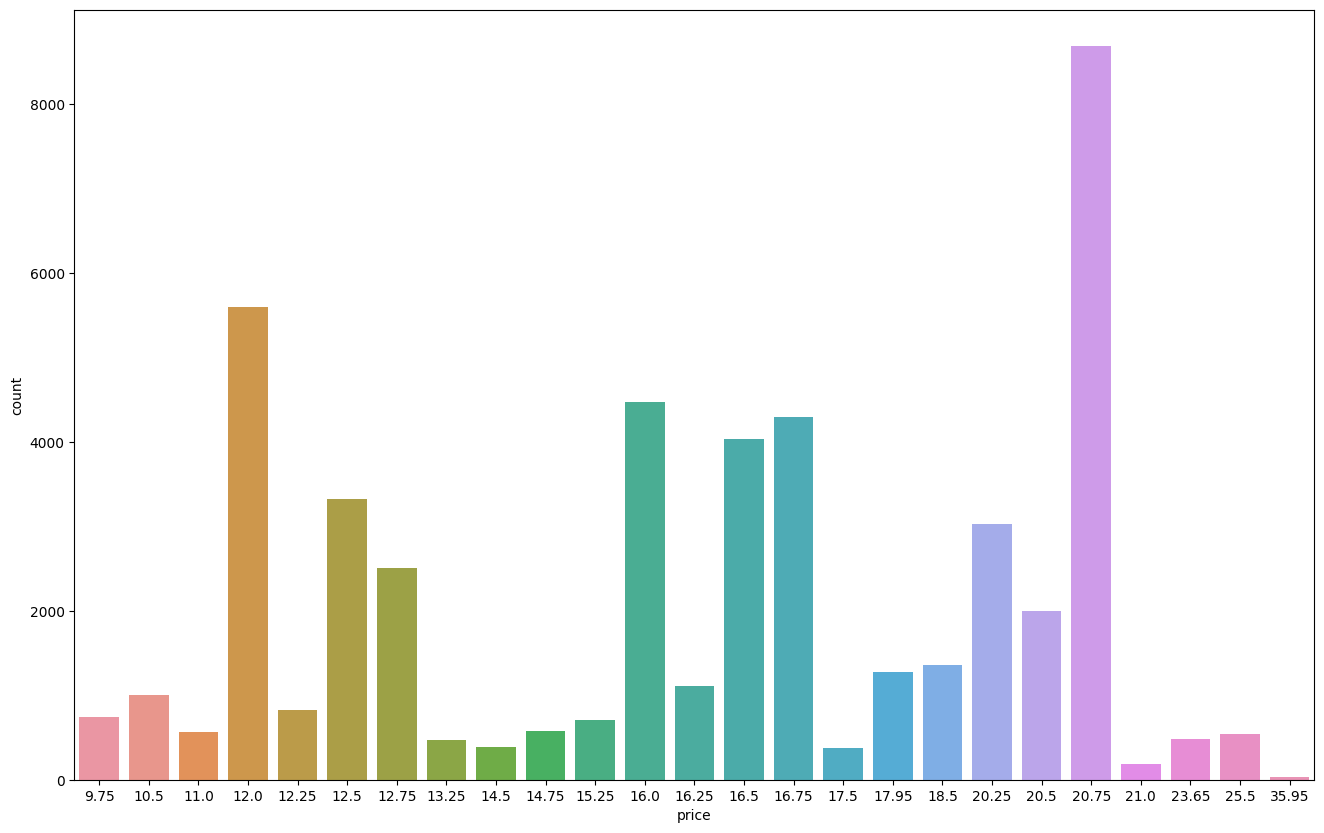

In [31]:
plt.figure(figsize=(16,10))
sns.countplot(data=merged_data, x='price')

20.75 is the most sold price while 35.95 is the least sold price

In [32]:
merged_data['category'].value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

([<matplotlib.patches.Wedge at 0x1cea01d0700>,
 [Text(-0.8896261791992277, 0.6469661979449806, 'Classic'),
  Text(-0.5240519409550533, -0.9671450579831556, 'Supreme'),
  Text(0.9280974901480739, -0.5904532570668453, 'Veggie'),
  Text(0.7076409174018589, 0.842166451492017, 'Chicken')],
 [Text(-0.48525064319957867, 0.35289065342453485, '30.0%'),
  Text(-0.28584651324821087, -0.5275336679908121, '24.2%'),
  Text(0.506234994626222, -0.32206541294555197, '23.5%'),
  Text(0.3859859549464684, 0.45936351899564554, '22.2%')])

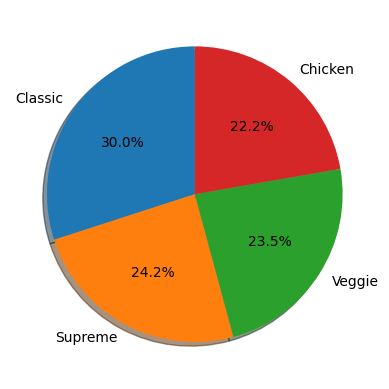

In [33]:
plt.pie(merged_data['category'].value_counts(), labels=merged_data['category'].value_counts().index,
       autopct='%1.1f%%',startangle=90,shadow=True)

<Axes: xlabel='category', ylabel='count'>

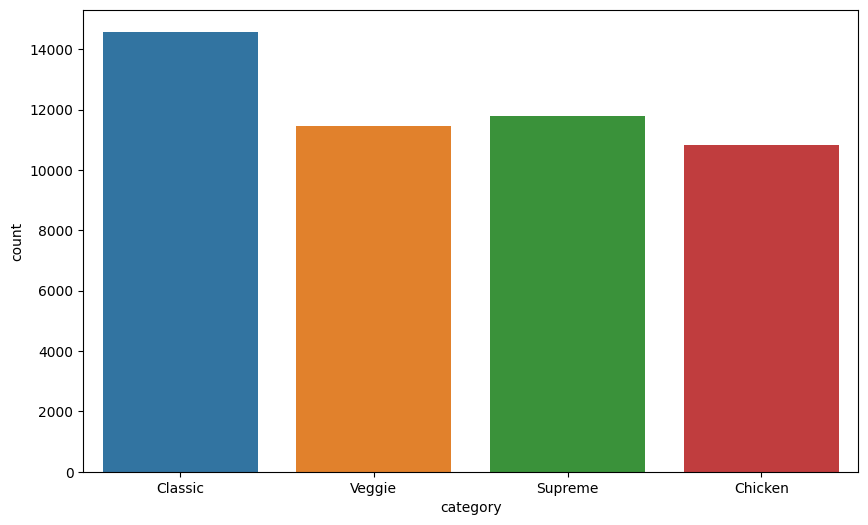

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=merged_data, x='category')

Classic category pizza are sold more

In [35]:
merged_data['Month'].value_counts()

7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

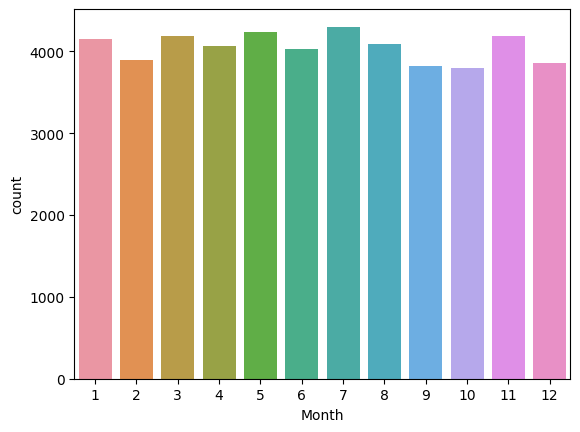

In [36]:
sns.countplot(data=merged_data, x='Month')

7(July) is  the most busiest month follow by 11(November)

In [37]:
merged_data['Day'].value_counts()

15    1844
1     1782
4     1773
27    1763
6     1673
3     1660
9     1656
11    1655
20    1650
17    1649
7     1647
8     1646
13    1643
14    1643
2     1624
16    1609
10    1601
23    1595
18    1589
21    1560
24    1546
26    1504
22    1484
19    1463
28    1450
12    1443
30    1439
5     1427
29    1361
25    1245
31     996
Name: Day, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

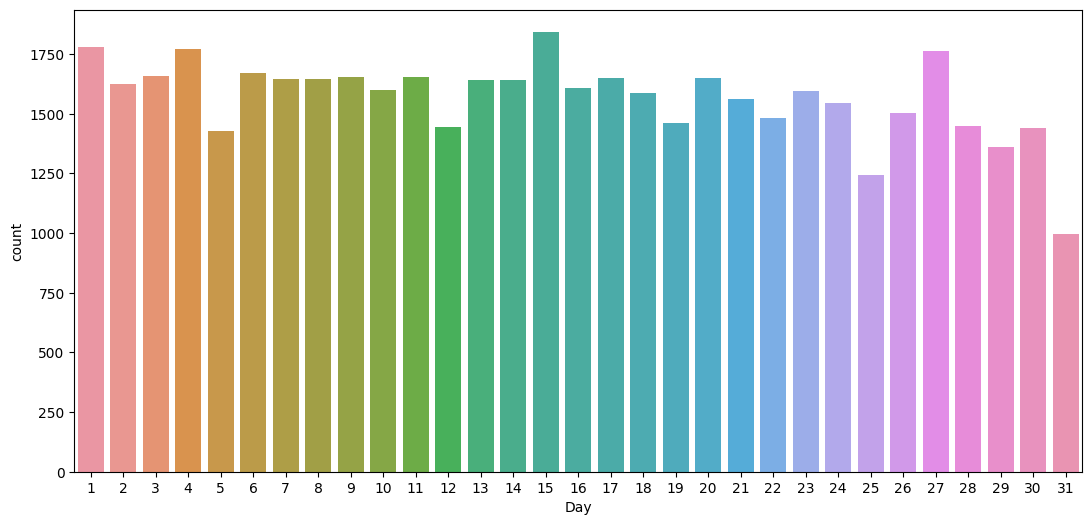

In [38]:
plt.figure(figsize=(13,6))
sns.countplot(data=merged_data, x='Day')

15 is the day when highest pizza was sold

In [39]:
merged_data['Weekday'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: Weekday, dtype: int64

<Axes: xlabel='Weekday', ylabel='count'>

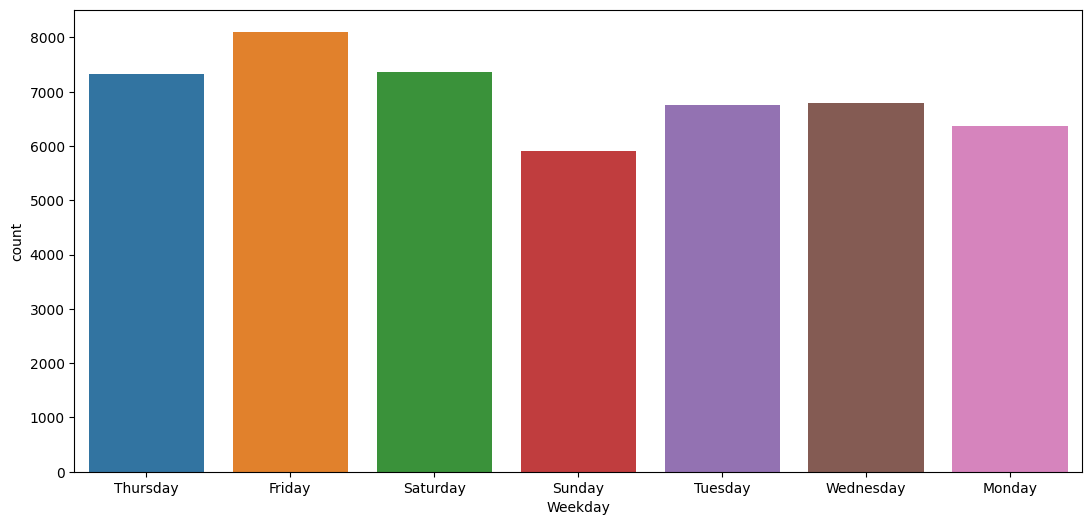

In [40]:
plt.figure(figsize=(13,6))
sns.countplot(data=merged_data, x='Weekday')

Friday is the busiest weekday  

In [41]:
merged_data['Hour'].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: Hour, dtype: int64

<Axes: xlabel='Hour', ylabel='count'>

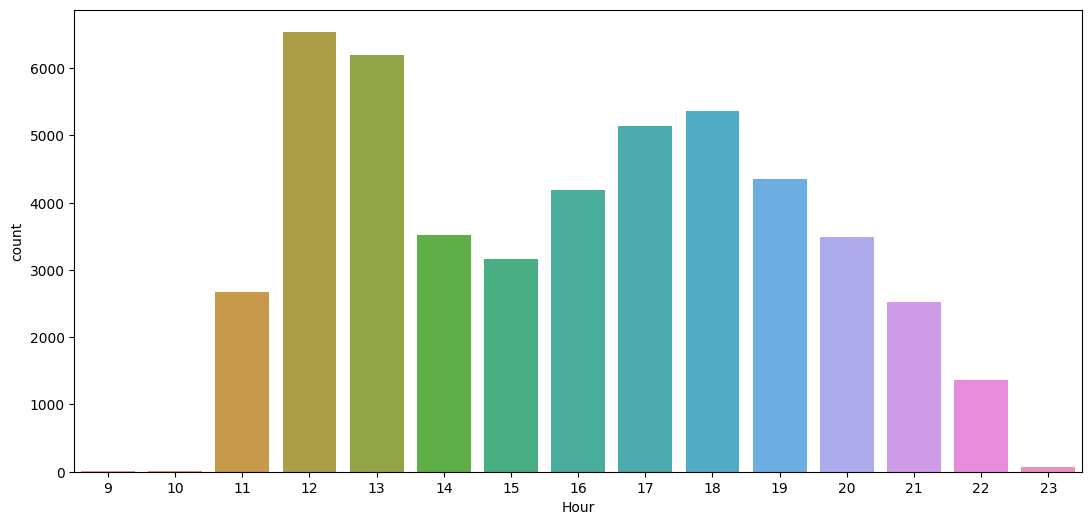

In [42]:
plt.figure(figsize=(13,6))
sns.countplot(data=merged_data, x='Hour')

More pizza are sold at 12pm - 1pm

<Axes: xlabel='size', ylabel='price'>

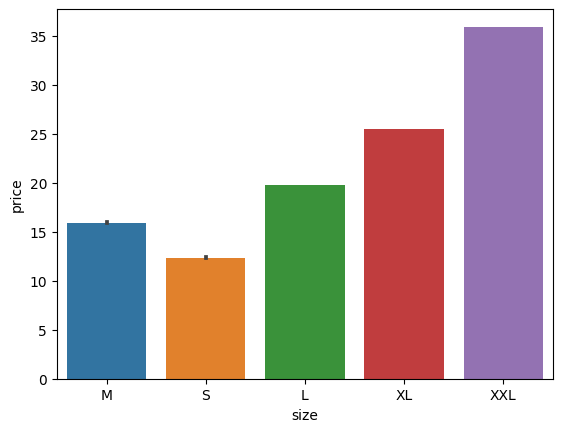

In [44]:
sns.barplot(x=merged_data['size'], y=merged_data['price'])

XXL size have the higherst prices

<Axes: xlabel='category', ylabel='price'>

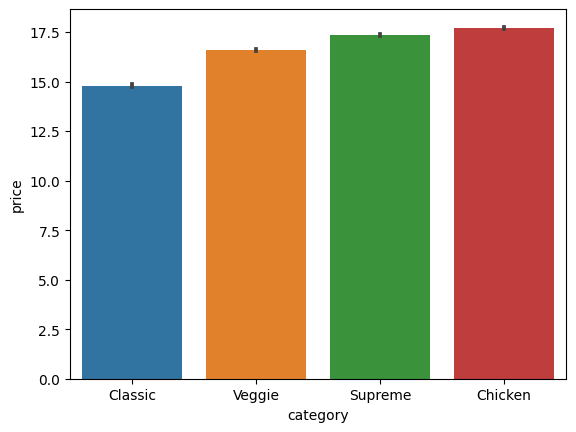

In [45]:
sns.barplot(x=merged_data['category'], y=merged_data['price'])

Chicken category have highest price

<Axes: xlabel='quantity', ylabel='price'>

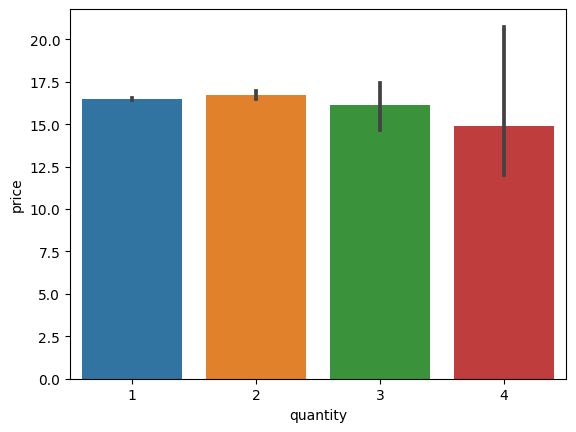

In [47]:
sns.barplot(x=merged_data['quantity'], y=merged_data['price'])

<Axes: xlabel='quantity', ylabel='category'>

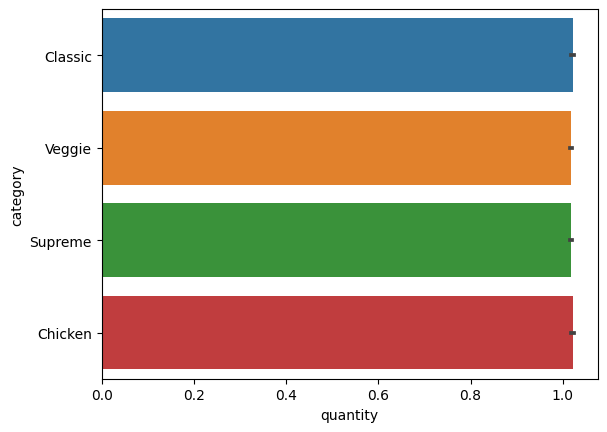

In [48]:
sns.barplot(x=merged_data['quantity'], y=merged_data['category'])